    CHAPTER 2 : DATA AND SAMPLING DISTRIBUTIONS

Population means the whole data  .. generally the large data set

Sample means the subset data from the population

Random sampling means that each member of the sample has equal probability to get chosen.

Sampling with replacement means population member that is once chosen for a sample ..  is put back to the population to get another sample and the same population member have chance to get chosen once again

Sampling concept is used in cross validation step to get sample of random or stratified sampling

Dividing the population into strata and randomly sampling from each strata.(strata means homogenous subgroup of population with common characteristics)

Bias-means leaning towards some representation which does not represent the population correctly 
for example taking only feedback from the rich.. deviates from population as it contains poor and middle class people

    BIAS

Statistical bais refer to the  sampling error that are systematic that is produced by the measurement process(taking feedback from only the rich) or by bias error occuring through the sampling(feedback is taken from all but the sampling is done such that it contains on ly rich people)

Random sampling error is also an error but there is no systematic pattern to it

     Quality vs quantity 

Always try to prefer the quality data over the quantity data

A true big data problem is like search engine of google where more queries(quiers are stored as a records) helps to give out better results

myu- Greek symbol is the mean of the population
x bar is the symbol tht represents the mean of the sample 

     Sampling Distribution of a statistic

Sample Statistic - here it means that metric used that cn be mean , median , or standard deviation

Data Distribution - frequency distribution of the each value of the dataset

Sampling distribution- frequency distribution of some sample statistic( like standard deviation, mean) drawn over many sample set or resamples from the same popultion

Typically the model is built from the samples and not from the population 

There might be some error in the model as it is based on the sample that is trained on ,We can evaluate the performance by testing out from the different sample set

Here we will prove that plot of original data plot is more skewed positively(right side)

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. 

The larger the sample the statistic is based on, the more it is normal or bell shaped curve . Also, the larger the sample, the narrower the distribution of the sample statistic.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path='/home/anish/plan/practical_statistics_notes/data/loans_income.csv'
loans_income=pd.read_csv(path)
loans_income=loans_income

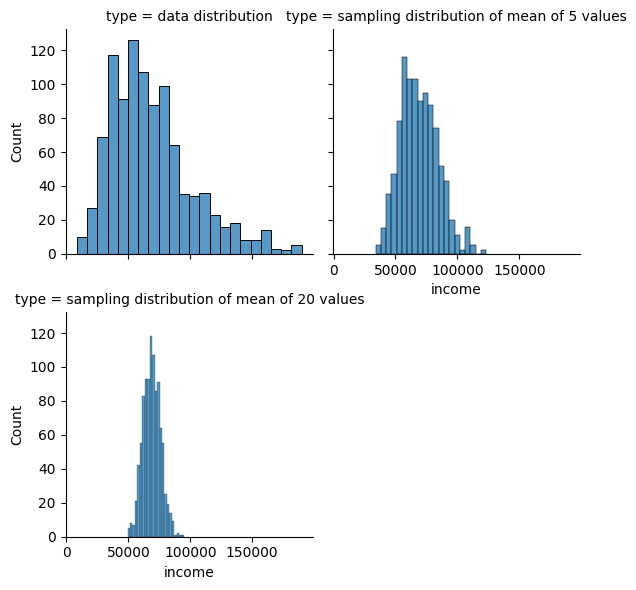

In [3]:
data_sample=pd.DataFrame({'income':loans_income.x.sample(1000),'type': 'data distribution'})

m5=[loans_income.x.sample(5).mean() for _ in range(1000)]
mean_5=pd.DataFrame({'income':m5,'type':'sampling distribution of mean of 5 values'})

m20=[loans_income.x.sample(20).mean() for _ in range(1000)]
mean_20=pd.DataFrame({'income':m20,'type':'sampling distribution of mean of 20 values'})

res=pd.concat([data_sample,mean_5,mean_20])
gridplot=sns.FacetGrid(res,col='type',col_wrap=2)

gridplot.map(sns.histplot,'income',)

     Central limit theorem - 

Tendency of a sampling distribution to take normal or bell shaped curve

The phenomenon from above graph is termed the central limit theorem. It says that the means drawn from multiple samples will resemble the 
familiar bell-shaped normal curve

Standard deviation -measure of the variablity of indivisual data points 

Standard error - measure of variability of the different sample set i.e this mesures how similar is the two samples taken from same population

It is measured by calculating standard deviation of the indivisual data points in a sample set adn divide it by root of the number of samples
standard error =s/root(n)

    Bootstrap sample
A sample taken with replacement from an observed data set.
   
    Resampling
The process of taking repeated samples from observed data; includes both boot‐
strap and permutation (shuffling) procedures.

      Confidence interval and sample distribution of a statistics(here median) with bootstrap method

confidence interval of 90% 
 0.05    50500.0
0.95    77000.0
Name: x, dtype: float64

Bootstrap Statistics:

original(population) median: x    62000.0
dtype: float64

sample median: x    62848.6775
dtype: float64

bias: x    848.6775
dtype: float64

standard error of 100 samples of 20 values taken from population: x    8053.150973
dtype: float64


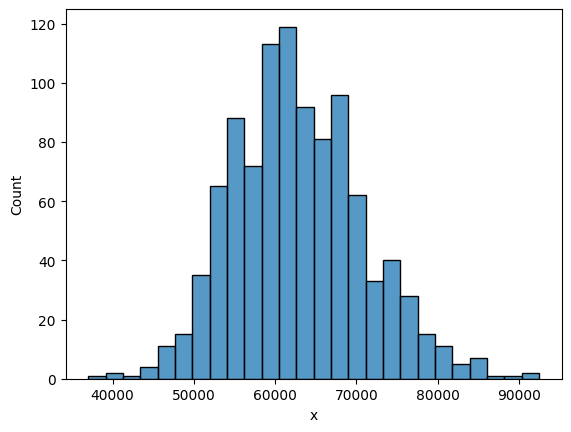

In [4]:
from  sklearn import utils
result =[]
for R in range(1000):
    sample =utils.resample(loans_income,n_samples=20) #resample is sample with replacment 
    result.append(sample.median()) # store the median of each sample taken into array
result=pd.DataFrame(result)
sns.histplot(result.x)
print(f'confidence interval of 90% \n {result.x.quantile(q=[0.05,0.95])}')

print('\nBootstrap Statistics:')
print(f'\noriginal(population) median: {loans_income.median()}')
print(f'\nsample median: {result.mean()}')
print(f'\nbias: {result.mean() - loans_income.median()}')
print(f'\nstandard error of 100 samples of 20 values taken from population: {result.std()}')

Sampling distribution of mean is more matured than any other metric as it is used more!

    Bootstraping aggregrate(maybe taking the mean for regression or taking vote for classification) 
 - alias bagging method is used to increase the performance of the predictive model

     Normal Distribution (ideal distribution .. too perfect distribution)

Normal Distribution is also called bell shaped curve.

Common misconception that the noraml distribution is called that because most of data follows a normal distribution but its not!!!

The name normal derives from the fact that many statistics(like mean , median ) of the sample distribution follow normal distribution

Key Terms:

Error- The difference between data point and a predicted value

Standardize - Subtract the mean and divide by the standard deviation

Z-score - The result of standardizing an individual data point

Standard Normal - A normal distribution with mean = 0 and standard deviation = 1

QQ-plot - A plot to visualise how close a sample distribution is to a specific distribution
theoritical line will be there and actual line will be there on the plot
if theoritical and actual are almost similar then it follow the expected distribution

Z-score is type of normalisation or standardizing that puts the data on the same scale as the standard normal distribution

Converting data to z score does not make data normally distributed

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936319))

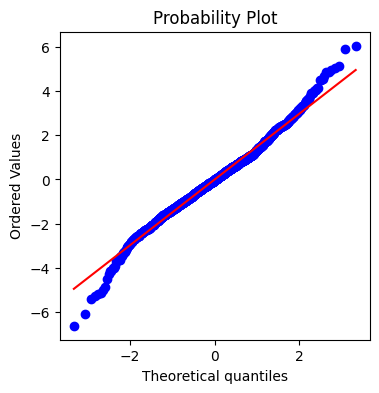

In [5]:
path='/home/anish/plan/practical_statistics_notes/data/sp500_data.csv'
sp=pd.read_csv(path)
nflx=sp.NFLX

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# log transformation to make it normal distribution
nflx = np.diff(np.log(nflx[nflx>0])) 

#Q-Q Plot
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx,plot=ax) 


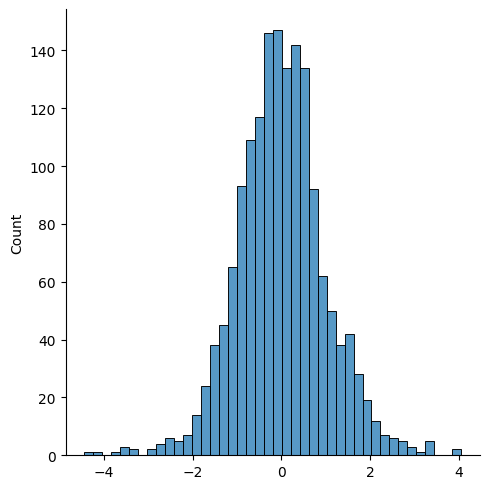

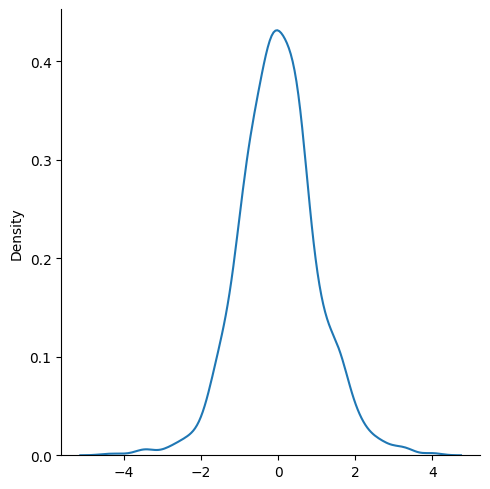

In [6]:
#Calculating Z-score that is normalising the data to same scale of standard normal normal distribution
meanflx=nflx.mean()
stdnflx=nflx.std()
z_nflx= (nflx - meanflx)/stdnflx
sns.displot(z_nflx,kind="hist")
sns.displot(z_nflx,kind="kde")

In a normal distribution 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations. And 99.7 of the data are within 3 standard deviation of the mean

     Long-Tailed Distribution  (my view : usually continous data)

Data generally is not normally distributed

Tail - long narrow portion of distribution where extreme values occur at low frequency

Skew - where one tail is longer than the other


((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([-1.97007936, -1.88185848, -1.87881638, ...,  3.94452245,
          3.96201452,  3.96201452])),
 (0.9658789452608367, -2.8834074255348056e-16, 0.9658085995476677))

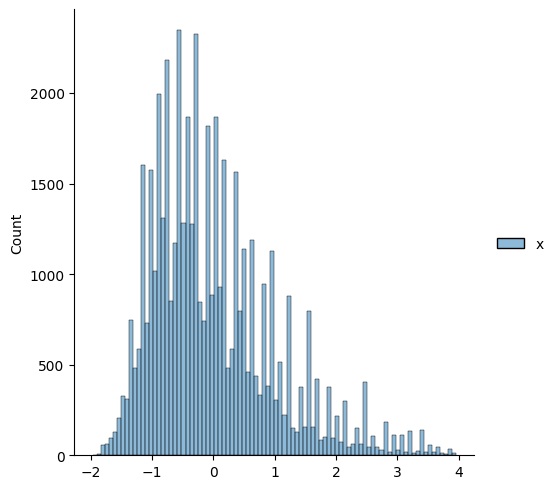

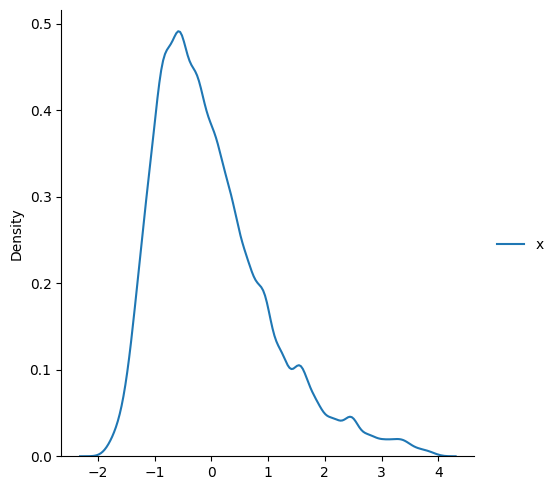

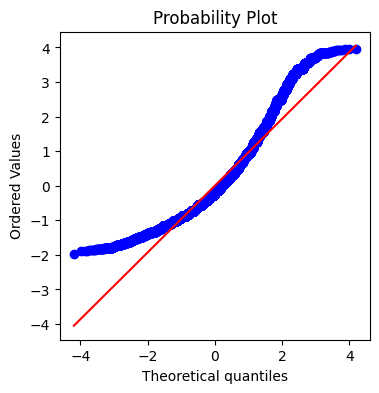

In [7]:
#standardisation of scale to standard normal distribution
mean=loans_income.mean()
std=loans_income.std()
z_score= (loans_income - mean)/std

#standardised normal distribution plot by default kind -"hist"
sns.displot(z_score,kind="hist")
sns.displot(z_score,kind="kde")  


from scipy import stats
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(z_score.x,plot=ax,dist="norm")


The first kde plot is long tailed(right-side) and also skewed(positively skewed as long tail is in right side)

The tails of the distribution correspondes to the extreme values (small and large)

In the  QQ plot 

*Small extreme - The data point that below the line corresponds to lower values 

*High extreme -The data point that above the line corresponds to higher values

Assuming a normal distribution can lead to underestimation of extreme events
(“black swans”)


    Students T distribution (usually used for t test)

T distribution is normally shaped but they have bit thicker and longer on the tails

Used in depicting distribution of sample statistics(example mean) because usually the distribution of sample statistics is normal distribution .. and t distribution is good at depicting the distribution of sample statistic as it normal

T distibution curve depends on the number of samples taken..more number of sample distribution becomes more of normal distibution

Have to look t table(default t distibution values ) to estimate confidence interval of a sample compared to t distribution

consider a sample size of n for which the smaple mean xbar is calculated and s is the std deviation
90% confidence interval around the sample mean is

xbar+ or - t(n-1 of 0.0.5 two tailed value of t table)*s/root(n)

    Binomial Distribution (Binomial - having two outcomes) (discrete)

Binomial distribution is called bernoulli distribution

Key to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities

It is not nessary that each outcome(head or tail) has 50-50 probability but the total probalitiy should be equal to 1

Binomial Distribution is the distribution of sucesses in x trails 

Binomial Distribution is the frequency distribution  of the number of success(x) in a given number of trails(n) with probability of occuring success(p)

The binomial distribution would answer a question like:
If the probability of a click converting to a sale is 0.02, what is the probability of
observing 0 sales in 200 clicks?

Answer stats.binom.pmf(k=0,n=200,p=0.02)

Pmf - returns the probability of getting exact X number of successes

Cdf - returns the probability of getting <= less than or equal to X number of sucesses


In [8]:
import scipy.stats as stats

#return the probability of getting the exact x number of success
prob_x=stats.binom.pmf(k=2,p=0.02,n=100)
print(f'pmf : {prob_x}')

#return the probability of getting the less than or equal number of sucess
prob_leq_x= stats.binom.cdf(k=2,p=0.02,n=100)
print(f'cdf : {prob_leq_x}')

print("its obvious that cdf prob is more than pmf ")

pmf : 0.2734139115697745
cdf : 0.6766856223517788
its obvious that cdf prob is more than pmf 


Binomial Distribution:

Mean(nxp) of the distribution is the n(number of trails) X p(probability of the success) 
variance of the distribution is (nXp)(1-p)

<AxesSubplot: >

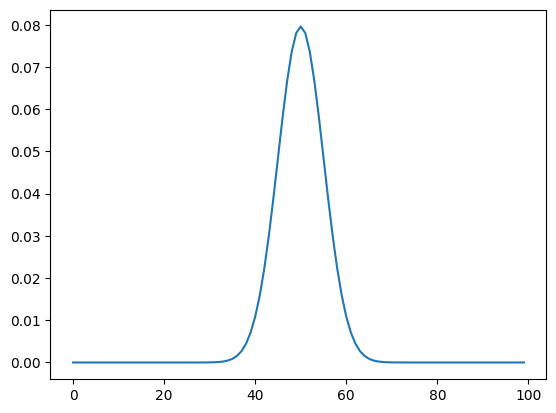

In [10]:
def plot_binomial(n_trail,p_x):
    points=[]
    for k_point in range(n_trail):
        points.append(stats.binom.pmf(k=k_point,p=p_x,n=n_trail))
    return points

res=plot_binomial(p_x=0.5,n_trail=100)

import seaborn as sns
sns.lineplot(res)

With a large enough number of trials (particularly when p is close to 0.50), the binomial distribution is virtually indistinguishable from the normal distribution.

Its not a suprise to use normal distribution with mean and variance as an approximation when calculating binomial possibilities with large sample size. But binomial distribution cannot be approximated to normal distribution when p value is veryyy close to 0 or 1 

    Chi-Square Distribution (test for checking departure from expectation usually with respect to category count)

Expectation is usually termed as as the null hypothesis

So the chi-square statistics is the measure of how much is the sample statistic is departed from null hypothesis

Small value of chi-square statistic means the sample is near to null hypothesis

High value of the chi-square statistic means the sample is not near to null hypothesis.

Chi-Square statistic - 

summation across all category of [(x_observed - x_expected) / sqrt(x_expected)]

This process also standarises the chi-square statistic so it can be compared to reference distribution

For example we want to test whether one variable is independent of another say at row represents gender and coloumn variable represents 'job promotion' (imagine it as confusion matrix .And the data in matrix is the count of each possibities like gender =1 and job promotion =1).

From this chi-square statistic a distribution taken is called chi-squared distribution

Chi square distribution is the distribution of chi-square statistic under repeated resampling drawn from the null hypothesis or the expectation hypothesis

Key Ideas : 

• The chi-square distribution is typically concerned with counts of subjects or
items falling into categories.

• The chi-square statistic measures the extent of departure from what you would
expect in a null model.




    F distribution (ANOVA test - Analysis of variance)

F distribution is similar to chi-square distribution but in this we are dealing with measured continous values rather than counts like in chi-square statistics

F statistics the ratio of variability between the group means to the varibility within each group means

ANOVA -
summation of (Xj(mean of jth group) -  X(mean of every data regardless of group))^2 / summation of (xij(ith data of jth group) - Xj(mean of jth Group))^2

Key Ideas

• The F-distribution is used with experiments and linear models involving meas‐
ured data.

• The F-statistic compares variation due to factors of interest to overall variation.

To see annova test see url ="https://www.statology.org/within-between-group-variation-anova/"


    Poission Distribution

In [1]:
import scipy.stats as stats

poi=stats.poisson.rvs(2,size=10000)

<AxesSubplot: ylabel='Count'>

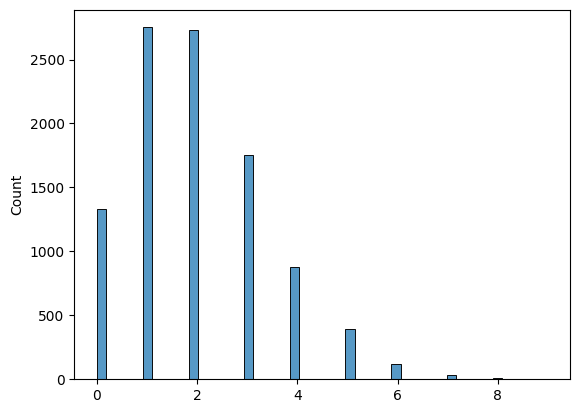

In [2]:
import seaborn as sns
sns.histplot(poi)